HAND-WRITTEN DIGITS RECOGNITION

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

LOADING DATASET

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train), len(x_test), len(x_test), len(y_test)

(60000, 10000, 10000, 10000)

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

PREPROCESSING DATA

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [7]:
x_train_flattened.shape, x_test_flattened.shape

((60000, 784), (10000, 784))

NEURAL NETWORK WITH NO HIDDEN LAYERS

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4724 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2736 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9260


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.2678 - accuracy: 0.9251


[0.26777681708335876, 0.9251000285148621]

In [12]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


array([1.72460508e-02, 3.96732730e-07, 7.03509152e-02, 9.49280679e-01,
       2.77686957e-03, 1.16688676e-01, 1.50645428e-06, 9.99781311e-01,
       1.03259526e-01, 6.45493150e-01], dtype=float32)

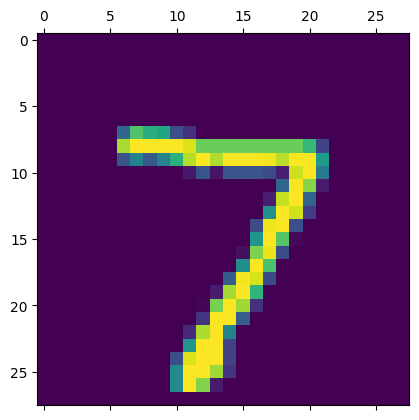

In [14]:
plt.matshow(x_test[0])

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

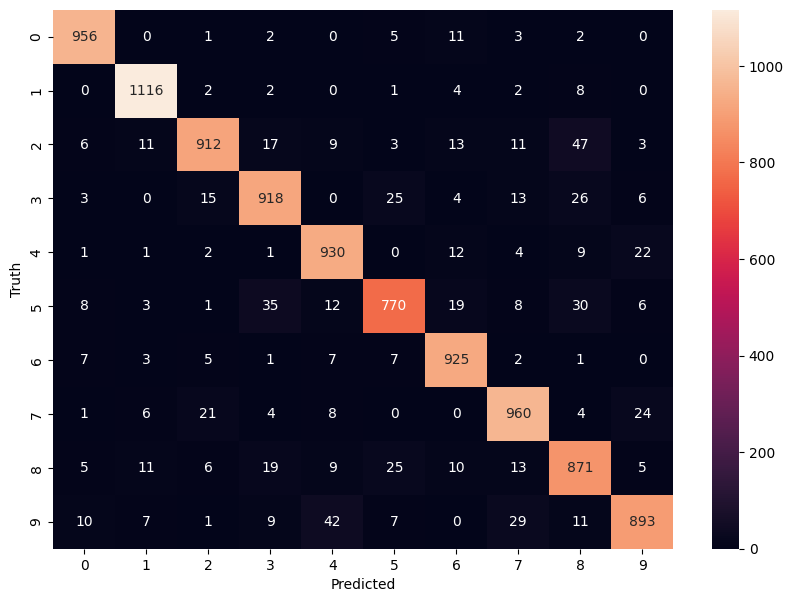

In [19]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NEURAL NETWORK WITH HIDDEN LAYER

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1239 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0533 - accuracy: 0.9839


In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9750


[0.08003724366426468, 0.9750000238418579]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

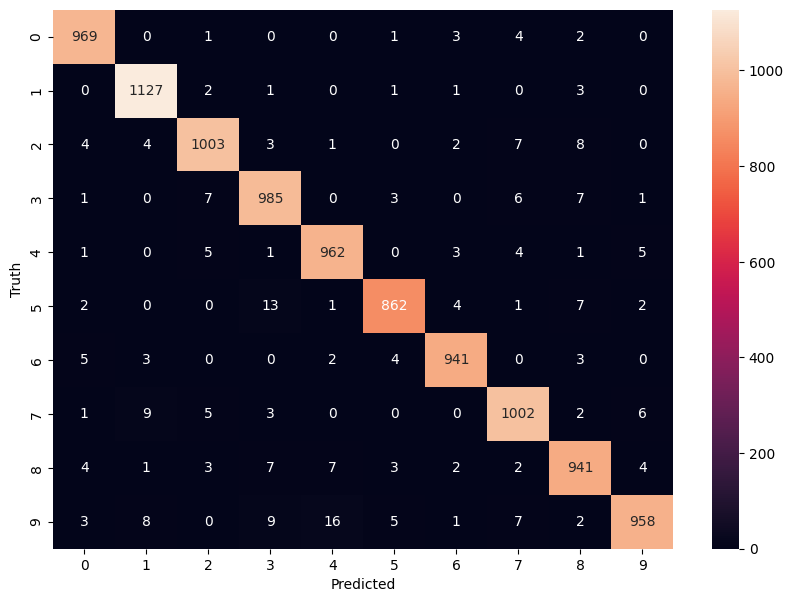

In [22]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

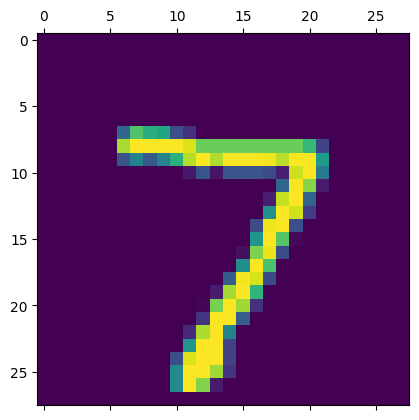

In [23]:
plt.matshow(x_test[0])

In [25]:
y_predicted_labels[0]

7

NEURAL NETWORK WITH HIDDEN LAYERS GIVES 97% ACCURACY